In [1]:
%load_ext autoreload
%autoreload 2

import jax
import jax.random as random
import jax.numpy as jnp

import ott
from ott.tools import transport

from target_new import *

print(f"JAX backend: {jax.default_backend()}")

JAX backend: cpu


In [3]:
 from linearGaussian_new import LinearGaussian
 key = random.PRNGKey(123)
 key, subk = random.split(key)
 g_gt = ErdosReniDAGDistribution(n_vars = 20).sample_G(key = subk, return_mat=False)
 theta = LinearGaussian(graph_dist = ErdosReniDAGDistribution(
            n_vars=20, 
            n_edges_per_node=2),mean_edge= 10).sample_parameters(key=subk, n_vars = 20)
 


In [5]:
generative_model.shape

(20, 20)

In [3]:
key = random.PRNGKey(123)
key, subk = random.split(key)
data, model = make_linear_gaussian_model(key=subk, n_vars=20, graph_prior_str="er")

In [20]:
data.passed_key

array([3107446009, 3736104797], dtype=uint32)

In [6]:
data.x.shape

(100, 20)

In [22]:
data.theta

[DeviceArray([[-2.2579439 ,  1.6911914 ,  1.1334798 , -1.4311824 ,
               -1.017936  , -1.7722476 ,  2.140372  ,  1.5610131 ,
               -0.5072684 ,  1.1757507 , -1.9499156 , -1.4106574 ,
                1.5665686 ,  0.5304006 ,  1.1757998 , -0.7402674 ,
                1.3065236 , -1.4984069 ,  1.9828898 , -0.7646949 ],
              [ 0.6898995 , -0.7492544 , -1.0303404 , -1.0967577 ,
                0.8316336 ,  1.8737067 ,  2.1323917 ,  0.6426575 ,
                0.6346039 , -0.80355775, -1.0423875 , -0.5373684 ,
                0.7894646 , -1.2072649 , -1.1243123 ,  0.5920304 ,
                0.74477166,  2.0853415 ,  0.9286977 ,  0.98807484],
              [ 0.6708227 ,  1.9507419 ,  1.3081424 , -0.6589951 ,
               -0.6815443 ,  1.1576409 ,  2.2307644 , -1.225159  ,
               -0.80150014, -1.3127525 ,  2.6633165 ,  0.53212917,
               -2.1047983 , -1.0286772 ,  1.2532508 ,  0.7558065 ,
                1.7866722 ,  2.126708  , -2.0080996 , -1.640

In [13]:
#dir(data)

In [19]:
#Sampling of 100 samples with the new procedure, for 2 time points
n_timepoints = 2
observations = []
for timepoint in range(n_timepoints):
    key = random.PRNGKey((timepoint+1)*100)
    key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=20, graph_prior_str="er",mean_edge=10.0,n_observations=10)
    observations.append(data.x)
observations

#No groups or patterns to be seen, everything is very random

[DeviceArray([[-5.96533279e+01,  6.60546265e+01,  6.07149109e+02,
                8.20736027e+00,  5.42745972e+00,  1.01821804e+01,
               -3.72895217e+00,  2.20059067e-01, -4.79089797e-01,
               -4.88123226e+00,  2.46217608e-01,  7.56365234e+03,
                5.57943506e+03, -5.29572535e+00,  4.22759342e+00,
                6.51201270e+03,  5.19423559e-02,  4.07200217e-01,
                4.62559938e-01,  7.33018982e+02],
              [ 3.96708822e+00, -5.13474178e+00, -6.06383018e+01,
               -6.78989697e+00, -7.63219893e-01, -7.25499916e+00,
                2.47304738e-01,  3.47147018e-01,  9.21119878e-04,
                6.95019215e-02,  6.91365451e-02, -6.22330322e+02,
               -6.22615845e+02,  2.34323442e-02,  4.98185730e+00,
               -6.28695435e+02,  9.57159773e-02,  1.91634655e-01,
               -8.96890834e-02, -4.75446053e+01],
              [-2.00327473e+01, -1.85336781e+01, -2.30446136e+02,
               -3.96595078e+01, -1.6067578

In [22]:
observations[0].shape

(10, 20)

## Sample parameters with different mean and standard deviation. 
#### 2 cases: 
- case 1: 2 groups in t1 with means -10 and 10 which move to 2 groups in t2 with means -20 and 10 
- case 2: 2 groups in t1 with means -10 and 10 which move to 3 groups in t2 with means -20, 5 and 15 

In [74]:
# Here case 1 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
for mean_edge in [-100, 10]:
    #key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, graph_prior_str="er",mean_edge=mean_edge,n_observations=50)
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

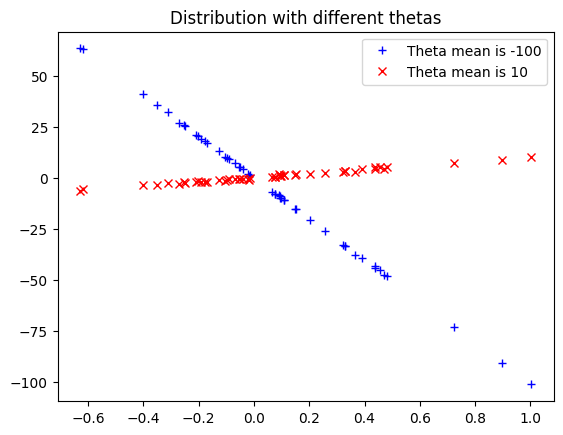

In [75]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(observations1[0:50, 0], observations1[0:50, 1], '+b', label='Theta mean is -100')
plt.plot(observations1[50:, 0], observations1[50:, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

In [76]:
key = random.PRNGKey(124)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []
for mean_edge in [10, -200]:
    #key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, graph_prior_str="er",mean_edge=mean_edge,n_observations=50)
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

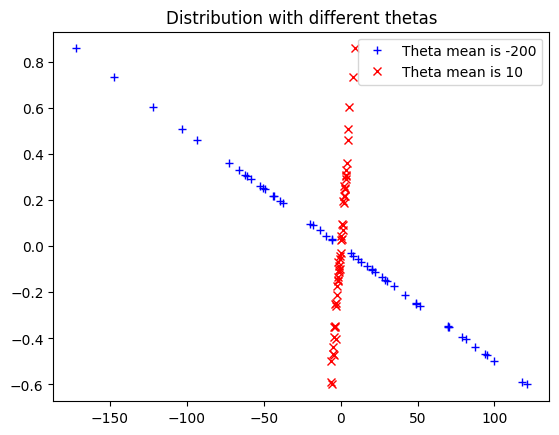

In [77]:
plt.plot(observations2[50:, 0], observations2[50:, 1], '+b', label='Theta mean is -200')
plt.plot(observations2[0:50, 0], observations2[0:50, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

In [78]:
# Samples two point clouds and their weights.
### For our synthetic data calculate the transport matrix
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (100,))
b = jax.random.uniform(rngs[1], (100,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

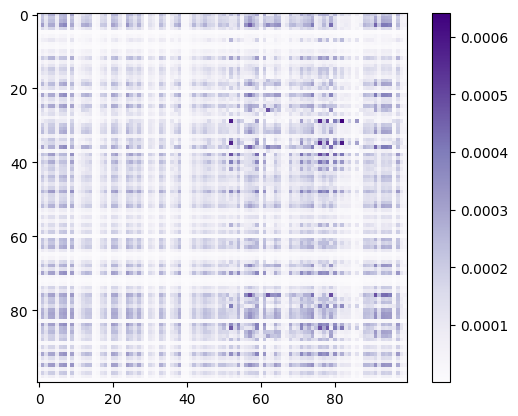

In [79]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

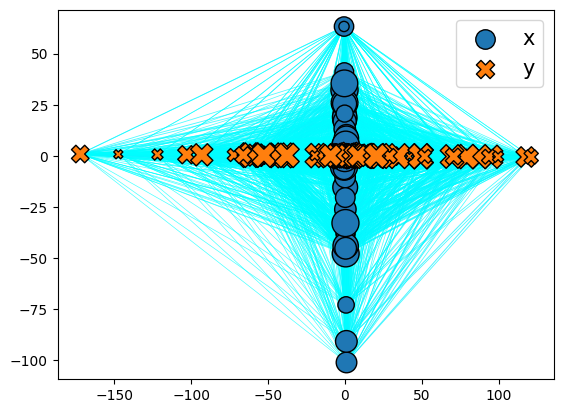

In [81]:
plott = ott.tools.plot.Plot()
_ = plott(ot)

In [40]:
# Here case 1 with 20-d example 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 20), dtype='float32')
thetas1 = []
for mean_edge in [-100, 10]:
    #key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=20, graph_prior_str="er",mean_edge=mean_edge,n_observations=50)
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

In [41]:
key = random.PRNGKey(124)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 20), dtype='float32')
thetas2 = []
for mean_edge in [10, -200]:
    #key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=20, graph_prior_str="er",mean_edge=mean_edge,n_observations=50)
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

### Try an optimal transport example:

In [43]:
# Samples two point clouds and their weights.
### For our synthetic data calculate the transport matrix
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (100,))
b = jax.random.uniform(rngs[1], (100,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

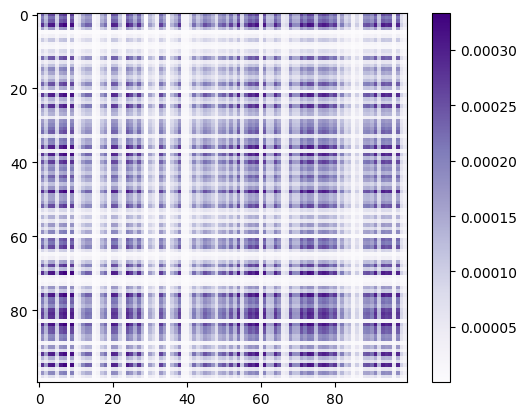

In [44]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

In [64]:
P.shape # this matrix contains the couplings between the points

(100, 100)

The optimization problem that we want to solve is the following: 
$$\min_{i,j} \pi_{ij}c_{ij} \quad 

\text{s.t} \quad \pi \mathbb{1} = \alpha \quad  \text{and} \quad \pi^T \mathbb{1} = b $$


I could also use more advanced tools for calculating $\Pi$. See [here](https://ott-jax.readthedocs.io/en/stable/_autosummary/ott.core.sinkhorn.sinkhorn.html)

In [67]:
# Here case 2 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations1 = jnp.empty(shape=(0, 2), dtype='float32')
thetas1 = []
for mean_edge in [-20,10]:
    #key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, graph_prior_str="er",mean_edge=mean_edge,n_observations=15)
    observations1 = jnp.concatenate([observations1,data.x])
    thetas1.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

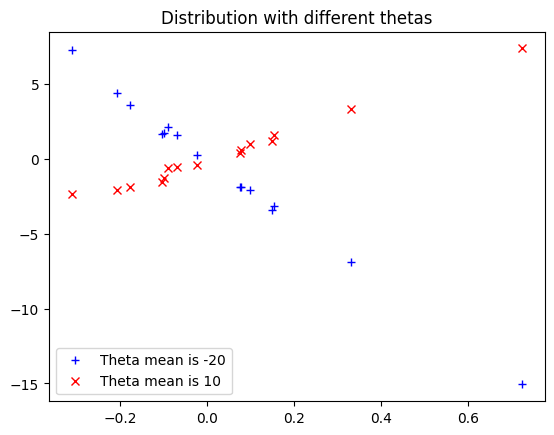

In [68]:
plt.figure(1)
plt.plot(observations1[0:15, 0], observations1[0:15, 1], '+b', label='Theta mean is -20')
plt.plot(observations1[15:, 0], observations1[15:, 1], 'xr', label='Theta mean is 10')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

In [69]:
# Here case 2 with 2-d examples 
key = random.PRNGKey(123)
key, subk = random.split(key)
observations2 = jnp.empty(shape=(0, 2), dtype='float32')
thetas2 = []
for mean_edge in [-30,-10,10]:
    #key, subk = random.split(key)
    data, model = make_linear_gaussian_model(key=subk, n_vars=2, graph_prior_str="er",mean_edge=mean_edge,n_observations=10)
    observations2 = jnp.concatenate([observations2,data.x])
    thetas2.extend(data.theta)

Text(0.5, 1.0, 'Distribution with different thetas')

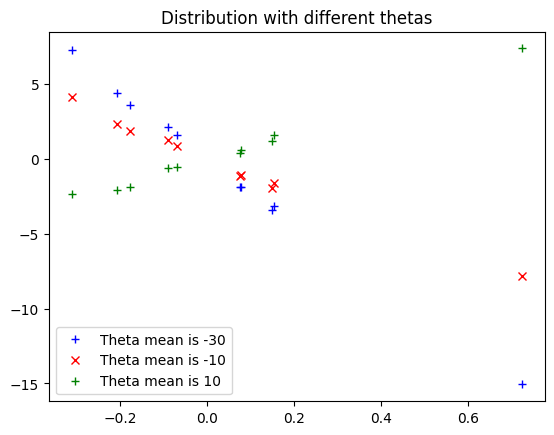

In [70]:
plt.figure(1)
plt.plot(observations2[0:10, 0], observations1[0:10, 1], '+b', label='Theta mean is -30')
plt.plot(observations2[10:20, 0], observations2[10:20, 1], 'xr', label='Theta mean is -10')
plt.plot(observations2[20:, 0], observations2[20:, 1], 'g+', label='Theta mean is 10')
plt.legend(loc=0)
plt.title('Distribution with different thetas')

In [71]:
# Samples two point clouds and their weights.
### For our synthetic data calculate the transport matrix
rngs = jax.random.split(jax.random.PRNGKey(0),2)
x1 = observations1
x2 = observations2
a = jax.random.uniform(rngs[0], (30,))
b = jax.random.uniform(rngs[1], (30,))
a, b = a / jnp.sum(a), b / jnp.sum(b)

# Computes the couplings via Sinkhorn algorithm.
ot = transport.solve(x1, x2, a=a, b=b)
# For adjacent time points we want to calculate the transport matrix (transport map) πti,ti+1
P = ot.matrix

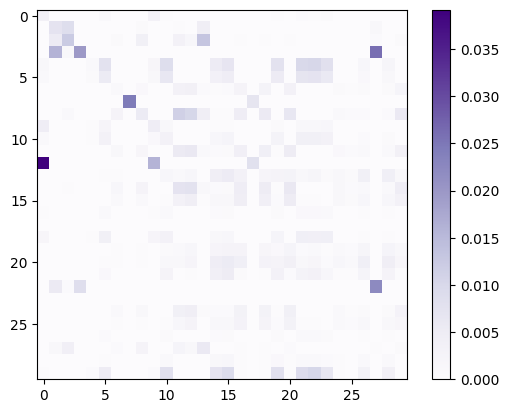

In [72]:
plt.imshow(P, cmap="Purples")
plt.colorbar()

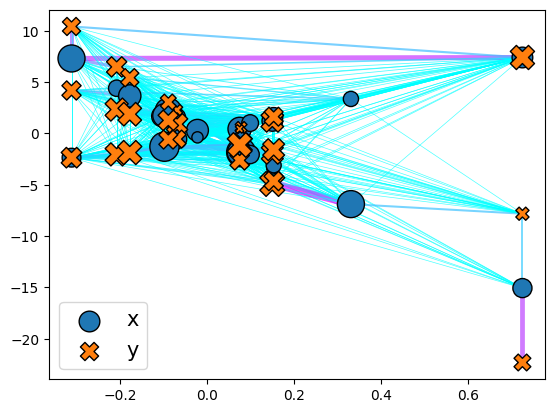

In [73]:
plott = ott.tools.plot.Plot()
_ = plott(ot)
